<a href="https://colab.research.google.com/github/Ekissi/Ekissi/blob/main/Machine_Learning_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1 SUPPORT VECTOR REGESSION MODEL**

In [ ]:
# @title Hyperparameters reseach with GridSearchCV
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt
import statistics
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

Dataset=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/features_selected_ok.xlsx')
features=Dataset[['Erg','Eyb','Ecb','Ecr','Ea','Eb','Ehl','Etrg','Etyb','Etcb','Etcr','Eta','Etb','Ethl']]
label=Y=Dataset['MC']
scalertr = StandardScaler().fit(features)
features = scalertr.transform(features)
indx_test = [2,7,16,21,24,30,36,40,46,50,55,61,66,72,78,
        84,87,92,96,101,106,111,117,122,127,132,136,
        140,143,146,151,158,164,169,173,180,181,187,194,200,203,207]
y_test=label[indx_test]
y_train = label.drop(y_test.index)
x_test = features[indx_test]
indx_label = label.index
indx_train = indx_label.drop(indx_test)
x_train = features[indx_train]
x_train

pca = PCA(n_components=8)  # Choose number of components
X_train_pca = pca.fit_transform(x_train)

# Tuning of parameters for regression by cross-validation
K = 10               # Number of cross valiations

# Parameters for tuning
parameters = [{'kernel': ['rbf'], 'gamma': [0.05,0.055, 0.062, 0.072, 0.083, 0.1, 0.12,0.17,0.25,0.5],'C': [1, 10, 100, 1000, 10000]}]
print("Tuning hyper-parameters")
grid_search = GridSearchCV(SVR(epsilon = 0.01), parameters, cv = K)
grid_search.fit(x_train, y_train)

# Checking the score for all parameters
print("Grid scores on training set:")
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid_search.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"% (mean, std * 2, params))

best_params = grid_search.best_params_
print("Best parameters:", best_params)

Tuning hyper-parameters
Grid scores on training set:
-99.999 (+/-339.383) for {'C': 1, 'gamma': 0.05, 'kernel': 'rbf'}
-104.731 (+/-355.149) for {'C': 1, 'gamma': 0.055, 'kernel': 'rbf'}
-112.563 (+/-378.097) for {'C': 1, 'gamma': 0.062, 'kernel': 'rbf'}
-120.477 (+/-399.706) for {'C': 1, 'gamma': 0.072, 'kernel': 'rbf'}
-126.693 (+/-420.295) for {'C': 1, 'gamma': 0.083, 'kernel': 'rbf'}
-135.392 (+/-450.125) for {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
-144.259 (+/-471.311) for {'C': 1, 'gamma': 0.12, 'kernel': 'rbf'}
-170.008 (+/-546.855) for {'C': 1, 'gamma': 0.17, 'kernel': 'rbf'}
-197.527 (+/-602.814) for {'C': 1, 'gamma': 0.25, 'kernel': 'rbf'}
-256.316 (+/-711.829) for {'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}
-32.835 (+/-74.907) for {'C': 10, 'gamma': 0.05, 'kernel': 'rbf'}
-33.251 (+/-76.535) for {'C': 10, 'gamma': 0.055, 'kernel': 'rbf'}
-33.596 (+/-78.045) for {'C': 10, 'gamma': 0.062, 'kernel': 'rbf'}
-34.172 (+/-80.314) for {'C': 10, 'gamma': 0.072, 'kernel': 'rbf'}
-34.922 (

In [ ]:
# @title Model SVR
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.decomposition import PCA
Dataset=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/features_selected_ok.xlsx')
features=Dataset[['Erg','Eyb','Ecb','Ecr','Ea','Eb','Ehl','Etrg','Etyb','Etcb','Etcr','Eta','Etb','Ethl']]
label=Y=Dataset['MC']
scalertr = StandardScaler().fit(features)
features = scalertr.transform(features)

indx_test = [2,7,16,21,24,30,36,40,46,50,55,61,66,72,78,
        84,87,92,96,101,106,111,117,122,127,132,136,
        140,143,146,151,158,164,169,173,180,181,187,194,200,203,207]
y_test=label[indx_test]
y_train = label.drop(y_test.index)
x_test = features[indx_test]
indx_label = label.index
indx_train = indx_label.drop(indx_test)
x_train = features[indx_train]
x_train

pca = PCA(n_components=8)  # Choose number of components
x_train_pca = pca.fit_transform(x_train)
n = 0.072
reg1 = SVR(kernel='rbf', C=100, gamma=n ,epsilon=.01)
model=reg1.fit(x_train_pca,y_train)

#TRAINING MODEL
y_pred = model.predict(x_train_pca)
Rsquared_tr=r2_score(y_train,y_pred )
mse_training=mean_squared_error(y_train,y_pred)
mae_training = mean_absolute_error(y_train,y_pred)

# MODEL TESTING
y_test_pca = pca.transform(x_test)
y_pred_test = model.predict(y_test_pca)
Rsquared_tt=r2_score(y_test,y_pred_test)
mse_test= mean_squared_error(y_test,y_pred_test)
mae_test = mean_absolute_error(y_test,y_pred_test)

print("TRAINING Rsquared:",Rsquared_tr)
print("TRAINING MSE:",mse_training)
print("TRAINING MAE:",mae_training)
print("TEST Rsquared:",Rsquared_tt)
print("TEST MSE:",mse_test)
print("TEST MAE:",mae_test)

TRAINING Rsquared: 0.9479118391287071
TRAINING MSE: 20.35190433227825
TRAINING MAE: 2.7993252188805773
TEST Rsquared: 0.907310869974413
TEST MSE: 35.34189027323738
TEST MAE: 4.420930167359896


Text(0.5, 1.0, 'Scatter plot of predicted vs True values')

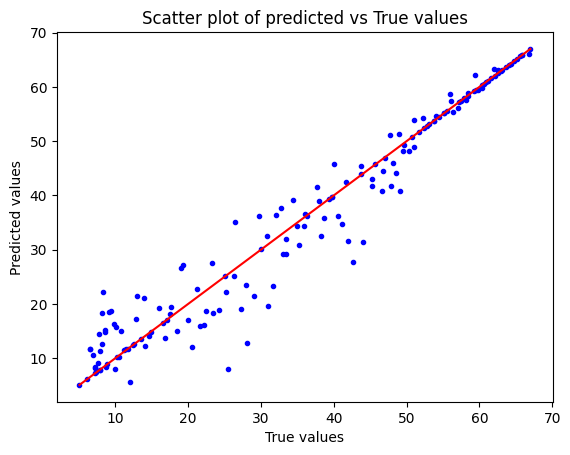

In [ ]:
# @title SVR Training plot
import matplotlib.pyplot as plt
plt.scatter(y_train,y_pred,color='blue',marker='.')
plt.plot(y_train, y_train, color='red')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('Scatter plot of predicted vs True values')
#plt.savefig('Scatter_plot_training_RIDGE_AP.jpg')
#plt.show()

Text(0.5, 1.0, 'Scatter plot of predicted vs True values')

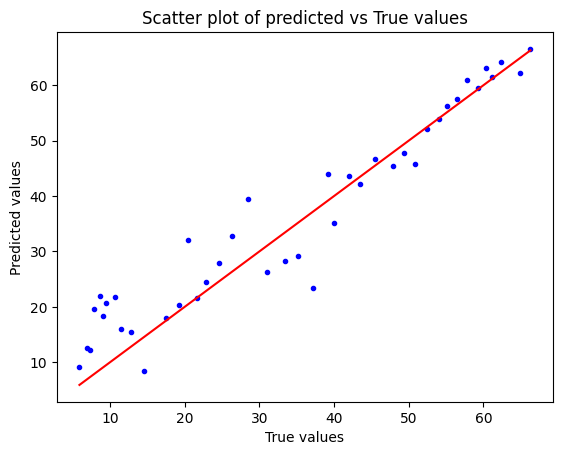

In [ ]:
# @title SVR Testing plot
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred_test,color='blue',marker='.')
plt.plot(y_test, y_test, color='red')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('Scatter plot of predicted vs True values')
#plt.savefig('Scatter_plot_test_RIDGE_AP.jpg')
#plt.show()

In [128]:
# @title SVR + Ridge Model
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import StackingRegressor
from sklearn.pipeline import make_pipeline
Dataset=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/features_selected_ok.xlsx')
features=Dataset[['Erg','Eyb','Ecb','Ecr','Ea','Eb','Ehl','Etrg','Etyb','Etcb','Etcr','Eta','Etb','Ethl']]
label=Y=Dataset['MC']
scalertr = StandardScaler().fit(features)
features = scalertr.transform(features)

indx_test = [2,7,16,21,24,30,36,40,46,50,55,61,66,72,78,
        84,87,92,96,101,106,111,117,122,127,132,136,
        140,143,146,151,158,164,169,173,180,181,187,194,200,203,207]
y_test=label[indx_test]
y_train = label.drop(y_test.index)
x_test = features[indx_test]
indx_label = label.index
indx_train = indx_label.drop(indx_test)
x_train = features[indx_train]
x_train

n = 0.7
svr_model = SVR(kernel='rbf', C=100, gamma=n ,epsilon=.01)
base_models = [('svr',svr_model), ('ridge',Ridge(alpha=0.001))]
meta_model = Ridge(alpha=0.001)
stacked_model = StackingRegressor(estimators=base_models, final_estimator=meta_model)
model=stacked_model.fit(x_train,y_train)

#TRAINING MODEL
y_pred = model.predict(x_train)
Rsquared_tr=r2_score(y_train,y_pred )
mse_training=mean_squared_error(y_train,y_pred)
mae_training = mean_absolute_error(y_train,y_pred)

# MODEL TESTING
#x_test_pca = pca.transform(x_test)
y_pred_test = model.predict(x_test)
Rsquared_tt=r2_score(y_test,y_pred_test)
mse_test= mean_squared_error(y_test,y_pred_test)
mae_test = mean_absolute_error(y_test,y_pred_test)

print("TRAINING Rsquared:",Rsquared_tr)
print("TRAINING MSE:",mse_training)
print("TRAINING MAE:",mae_training)
print("TEST Rsquared:",Rsquared_tt)
print("TEST MSE:",mse_test)
print("TEST MAE:",mae_test)

TRAINING Rsquared: 0.9393750190405923
TRAINING MSE: 23.687413646275527
TRAINING MAE: 3.69838906996399
TEST Rsquared: 0.916560994166644
TEST MSE: 31.814865323004238
TEST MAE: 4.536285571749767


# **2 RIDGE** **REGRESSION**

In [ ]:
# @title Hyperparameters reseach with GridSearchCV

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV


Dataset=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/features_selected_ok.xlsx')
features=Dataset[['Erg','Eyb','Ecb','Ecr','Ea','Eb','Ehl','Etrg','Etyb','Etcb','Etcr','Eta','Etb','Ethl']]
label=Y=Dataset['MC']
scalertr = StandardScaler().fit(features)
features = scalertr.transform(features)
indx_test = [2,7,16,21,24,30,36,40,46,50,55,61,66,72,78,
        84,87,92,96,101,106,111,117,122,127,132,136,
        140,143,146,151,158,164,169,173,180,181,187,194,200,203,207]
y_test=label[indx_test]
y_train = label.drop(y_test.index)
x_test = features[indx_test]
indx_label = label.index
indx_train = indx_label.drop(indx_test)
x_train = features[indx_train]
x_train


# Tuning of parameters for regression by cross-validation
K = 20               # Number of cross valiations

# Parameters for tuning
parameters = [{'alpha': [1e-07,0.00001,0.0001,0.001,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}]
print("Tuning hyper-parameters")
grid_search = GridSearchCV(Ridge(), parameters, cv = K)
grid_search.fit(x_train, y_train)

# Checking the score for all parameters
print("Grid scores on training set:")
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid_search.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"% (mean, std * 2, params))

    best_params = grid_search.best_params_
print("Best parameters:", best_params)

Tuning hyper-parameters
Grid scores on training set:
-186.555 (+/-737.332) for {'alpha': 1e-07}
-186.614 (+/-737.837) for {'alpha': 1e-05}
-187.149 (+/-742.332) for {'alpha': 0.0001}
-192.351 (+/-779.741) for {'alpha': 0.001}
-216.888 (+/-916.224) for {'alpha': 0.01}
-240.583 (+/-1034.598) for {'alpha': 0.05}
-248.283 (+/-1072.973) for {'alpha': 0.1}
-253.118 (+/-1098.403) for {'alpha': 0.2}
-254.916 (+/-1108.317) for {'alpha': 0.3}
-255.946 (+/-1113.785) for {'alpha': 0.4}
-256.696 (+/-1117.380) for {'alpha': 0.5}
-257.322 (+/-1120.010) for {'alpha': 0.6}
-257.880 (+/-1122.076) for {'alpha': 0.7}
-258.398 (+/-1123.779) for {'alpha': 0.8}
-258.885 (+/-1125.235) for {'alpha': 0.9}
-259.350 (+/-1126.515) for {'alpha': 1}
Best parameters: {'alpha': 1e-07}


In [ ]:
# @title Ridge Model
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
#from math import sqrt

#from sklearn.pipeline import make_pipeline
Dataset=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/features_selected_ok.xlsx')
features=Dataset[['Erg','Eyb','Ecb','Ecr','Ea','Eb','Ehl','Etrg','Etyb','Etcb','Etcr','Eta','Etb','Ethl']]
label=Y=Dataset['MC']
scalertr = StandardScaler().fit(features)
features = scalertr.transform(features)

indx_test = [2,7,16,21,24,30,36,40,46,50,55,61,66,72,78,
        84,87,92,96,101,106,111,117,122,127,132,136,
        140,143,146,151,158,164,169,173,180,181,187,194,200,203,207]
y_test=label[indx_test]
y_train = label.drop(y_test.index)
x_test = features[indx_test]
indx_label = label.index
indx_train = indx_label.drop(indx_test)
x_train = features[indx_train]
x_train

ridge = Ridge(alpha=0.00001)
model= ridge.fit(x_train, y_train)

#TRAINING MODEL
y_pred = model.predict(x_train)
Rsquared_tr=r2_score(y_train,y_pred )
mse_training=mean_squared_error(y_train,y_pred)
mae_training = mean_absolute_error(y_train,y_pred)

# MODEL TESTING
#TEST 1
y_pred_test = model.predict(x_test)
Rsquared_tt=r2_score(y_test,y_pred_test)
mse_test= mean_squared_error(y_test,y_pred_test)
mae_test = mean_absolute_error(y_test,y_pred_test)

print("TRAINING Rsquared:",Rsquared_tr)
print("TRAINING MSE:",mse_training)
print("TRAINING MAE:",mae_training)
print("TEST Rsquared:",Rsquared_tt)
print("TEST MSE:",mse_test)
print("TEST MAE:",mae_test)


TRAINING Rsquared: 0.8879242114524334
TRAINING MSE: 43.790291082091514
TRAINING MAE: 5.019529439715814
TEST Rsquared: 0.8899635361865499
TEST MSE: 41.956339746380976
TEST MAE: 5.142394563149868


Text(0.5, 1.0, 'Scatter plot of predicted vs True values')

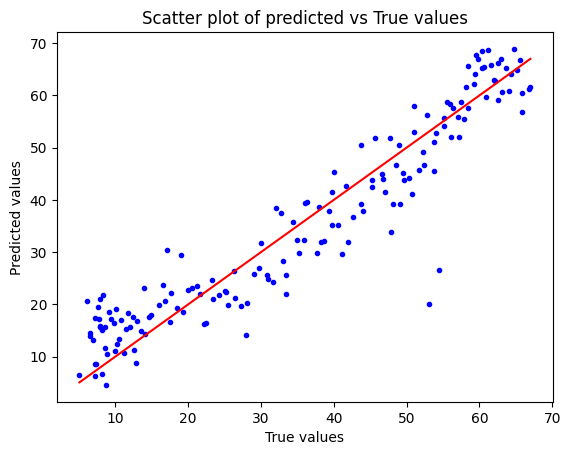

In [ ]:
# @title Ridge Training plot
import matplotlib.pyplot as plt
plt.scatter(y_train,y_pred,color='blue',marker='.')
plt.plot(y_train, y_train, color='red')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('Scatter plot of predicted vs True values')
#plt.savefig('Scatter_plot_training_RIDGE_AP.jpg')
#plt.show()

Text(0.5, 1.0, 'Scatter plot of predicted vs True values')

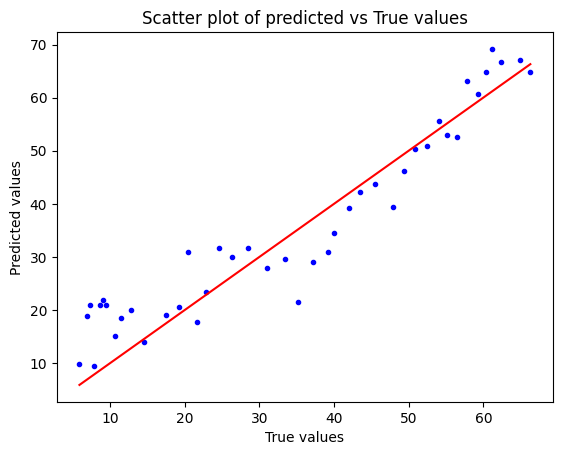

In [ ]:
# @title Ridge Testing plot
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred_test,color='blue',marker='.')
plt.plot(y_test, y_test, color='red')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('Scatter plot of predicted vs True values')
#plt.savefig('Scatter_plot_test_RIDGE_AP.jpg')
#plt.show()

# **3 POLYNOMIAL**

In [ ]:
# @title POLYNOMIAL Model
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA

Dataset=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/features_selected_ok.xlsx')
features=Dataset[['Erg','Eyb','Ecb','Ecr','Ea','Eb','Ehl','Etrg','Etyb','Etcb','Etcr','Eta','Etb','Ethl']]
label=Y=Dataset['MC']
scalertr = StandardScaler().fit(features)
features = scalertr.transform(features)

indx_test = [2,7,16,21,24,30,36,40,46,50,55,61,66,72,78,
        84,87,92,96,101,106,111,117,122,127,132,136,
        140,143,146,151,158,164,169,173,180,181,187,194,200,203,207]
y_test=label[indx_test]
y_train = label.drop(y_test.index)
x_test = features[indx_test]
indx_label = label.index
indx_train = indx_label.drop(indx_test)
x_train = features[indx_train]
x_train

degree = 2
poly_features = PolynomialFeatures(degree=degree)
poly_model = make_pipeline(poly_features , PCA(n_components=50),LinearRegression())
model= poly_model.fit(x_train, y_train)
#TRAINING MODEL
x_poly_train = poly_features.fit_transform(x_train)
y_pred = model.predict(x_train)

Rsquared_tr=r2_score(y_train,y_pred )
mse_training=mean_squared_error(y_train,y_pred)
mae_training = mean_absolute_error(y_train,y_pred)

# MODEL TESTING
#TEST 1
x_poly_test = poly_features.fit_transform(x_test)
y_pred_test = model.predict(x_test)

Rsquared_tt=r2_score(y_test,y_pred_test)
mse_test= mean_squared_error(y_test,y_pred_test)
mae_test = mean_absolute_error(y_test,y_pred_test)

print("TRAINING Rsquared:",Rsquared_tr)
print("TRAINING MSE:",mse_training)
print("TRAINING MAE:",mae_training)
print("TEST Rsquared:",Rsquared_tt)
print("TEST MSE:",mse_test)
print("TEST MAE:",mae_test)


TRAINING Rsquared: 0.9365513708253556
TRAINING MSE: 24.79067045901852
TRAINING MAE: 3.8381890097359883
TEST Rsquared: 0.9069127024598719
TEST MSE: 35.49370950603626
TEST MAE: 4.661215625188891


Text(0.5, 1.0, 'Scatter plot of predicted vs True values')

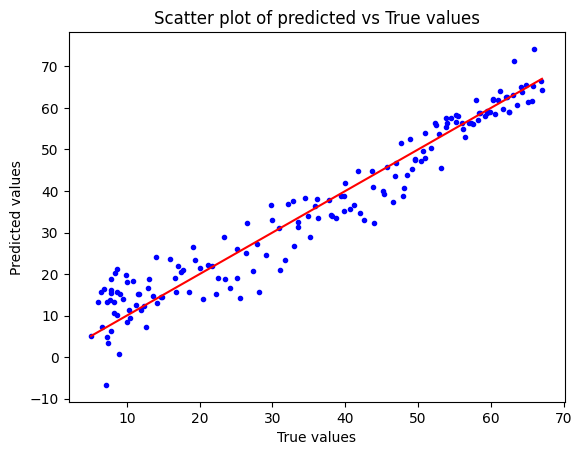

In [ ]:
# @title Polynomial Training plot
import matplotlib.pyplot as plt
plt.scatter(y_train,y_pred,color='blue',marker='.')
plt.plot(y_train, y_train, color='red')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('Scatter plot of predicted vs True values')
#plt.savefig('Scatter_plot_training_RIDGE_AP.jpg')
#plt.show()

Text(0.5, 1.0, 'Scatter plot of predicted vs True values')

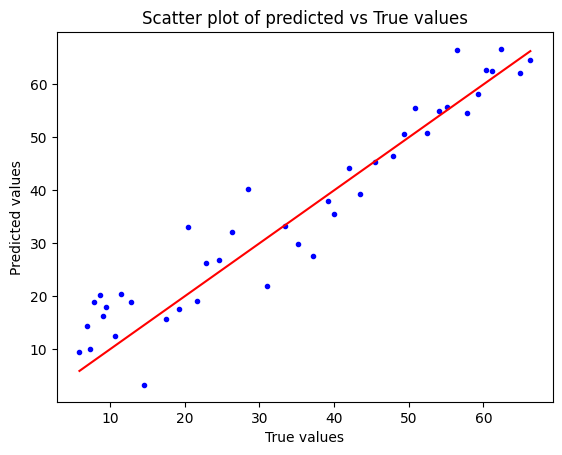

In [ ]:
# @title Polynomial Testing plot
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred_test,color='blue',marker='.')
plt.plot(y_test, y_test, color='red')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('Scatter plot of predicted vs True values')
#plt.savefig('Scatter_plot_test_RIDGE_AP.jpg')
#plt.show()

In [103]:
# @title POLYNOMIAL + RIDGE Model
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge, Lasso
from sklearn.decomposition import PCA

Dataset=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/features_selected_ok.xlsx')
features=Dataset[['Erg','Eyb','Ecb','Ecr','Ea','Eb','Ehl','Etrg','Etyb','Etcb','Etcr','Eta','Etb','Ethl']]
label=Y=Dataset['MC']
scalertr = StandardScaler().fit(features)
features = scalertr.transform(features)

indx_test = [2,7,16,21,24,30,36,40,46,50,55,61,66,72,78,
        84,87,92,96,101,106,111,117,122,127,132,136,
        140,143,146,151,158,164,169,173,180,181,187,194,200,203,207]
y_test=label[indx_test]
y_train = label.drop(y_test.index)
x_test = features[indx_test]
indx_label = label.index
indx_train = indx_label.drop(indx_test)
x_train = features[indx_train]
x_train

degree = 2
poly_features = PolynomialFeatures(degree=degree)
poly_model = make_pipeline(poly_features , PCA(n_components=40), Ridge(alpha=0.001))
model= poly_model.fit(x_train, y_train)
#TRAINING MODEL
x_poly_train = poly_features.fit_transform(x_train)
y_pred = model.predict(x_train)

Rsquared_tr=r2_score(y_train,y_pred )
mse_training=mean_squared_error(y_train,y_pred)
mae_training = mean_absolute_error(y_train,y_pred)

# MODEL TESTING
#TEST 1
x_poly_test = poly_features.fit_transform(x_test)
y_pred_test = model.predict(x_test)

Rsquared_tt=r2_score(y_test,y_pred_test)
mse_test= mean_squared_error(y_test,y_pred_test)
mae_test = mean_absolute_error(y_test,y_pred_test)

print("TRAINING Rsquared:",Rsquared_tr)
print("TRAINING MSE:",mse_training)
print("TRAINING MAE:",mae_training)
print("TEST Rsquared:",Rsquared_tt)
print("TEST MSE:",mse_test)
print("TEST MAE:",mae_test)


TRAINING Rsquared: 0.9341800039822568
TRAINING MSE: 25.717211736732967
TRAINING MAE: 3.967085399491577
TEST Rsquared: 0.9101373117433502
TEST MSE: 34.26418251145454
TEST MAE: 4.612374725502288


Text(0.5, 1.0, 'Scatter plot of predicted vs True values')

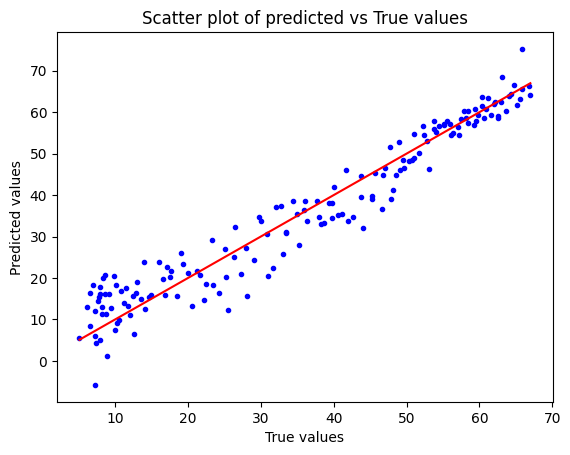

In [104]:
# @title Polynomial + Ridge Training plot
import matplotlib.pyplot as plt
plt.scatter(y_train,y_pred,color='blue',marker='.')
plt.plot(y_train, y_train, color='red')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('Scatter plot of predicted vs True values')
#plt.savefig('Scatter_plot_training_RIDGE_AP.jpg')
#plt.show()

Text(0.5, 1.0, 'Scatter plot of predicted vs True values')

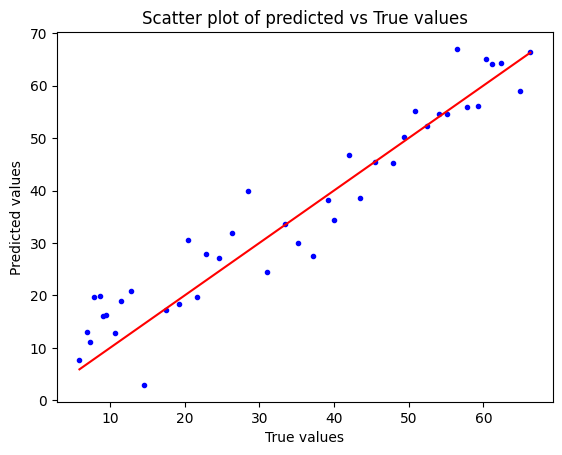

In [105]:
# @title Polynomial + Ridge Testing plot
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred_test,color='blue',marker='.')
plt.plot(y_test, y_test, color='red')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('Scatter plot of predicted vs True values')
#plt.savefig('Scatter_plot_test_RIDGE_AP.jpg')
#plt.show()

# **4 PLS REGRESSION**

In [ ]:
# @title Hyperparameters reseach with GridSearchCV
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression

Dataset=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/features_selected_ok.xlsx')
features=Dataset[['Erg','Eyb','Ecb','Ecr','Ea','Eb','Ehl','Etrg','Etyb','Etcb','Etcr','Eta','Etb','Ethl']]
label=Y=Dataset['MC']
scalertr = StandardScaler().fit(features)
features = scalertr.transform(features)
X_train,X_test,y_train,y_test = train_test_split(features,label,test_size=0.2,random_state=200)

# Tuning of parameters for regression by cross-validation
K = 20               # Number of cross valiations

# Parameters for tuning
parameters = [{'n_components': [2,3,4,5,6,7,8,9,10,11,12,13,14]}]
print("Tuning hyper-parameters")
grid_search = GridSearchCV(PLSRegression(tol=0.01,max_iter=10000), parameters, cv = K)
grid_search.fit(X_train, y_train)

# Checking the score for all parameters
print("Grid scores on training set:")
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid_search.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"% (mean, std * 2, params))

    best_params = grid_search.best_params_
print("Best parameters:", best_params)

In [ ]:
# @title PLS Model
import pandas as pd
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

Dataset=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/features_selected_ok.xlsx')
features=Dataset[['Erg','Eyb','Ecb','Ecr','Ea','Eb','Ehl','Etrg','Etyb','Etcb','Etcr','Eta','Etb','Ethl']]
label=Y=Dataset['MC']
scalertr = StandardScaler().fit(features)
features = scalertr.transform(features)
indx_test = [2,7,16,21,24,30,36,40,46,50,55,61,66,72,78,
        84,87,92,96,101,106,111,117,122,127,132,136,
        140,143,146,151,158,164,169,173,180,181,187,194,200,203,207]
y_test=label[indx_test]
y_train = label.drop(y_test.index)
x_test = features[indx_test]
indx_label = label.index
indx_train = indx_label.drop(indx_test)
x_train = features[indx_train]
x_train

plsr = PLSRegression(n_components=9,tol=0.01,max_iter=1000)
model= plsr.fit(x_train, y_train)
    #TRAINING MODEL
y_pred = model.predict(x_train)

Rsquared_tr=r2_score(y_train,y_pred )
mse_training=mean_squared_error(y_train,y_pred)
mae_training = mean_absolute_error(y_train,y_pred)

# MODEL TESTING
#TEST 1
y_pred_test = model.predict(x_test)

Rsquared_tt=r2_score(y_test,y_pred_test)
mse_test= mean_squared_error(y_test,y_pred_test)
mae_test = mean_absolute_error(y_test,y_pred_test)

print("TRAINING Rsquared:",Rsquared_tr)
print("TRAINING MSE:",mse_training)
print("TRAINING MAE:",mae_training)
print("TEST Rsquared:",Rsquared_tt)
print("TEST MSE:",mse_test)
print("TEST MAE:",mae_test)


TRAINING Rsquared: 0.8558426479441444
TRAINING MSE: 56.325210734254696
TRAINING MAE: 5.594569675595808
TEST Rsquared: 0.8681604464904908
TEST MSE: 50.26974611283359
TEST MAE: 6.056884974044742


Text(0.5, 1.0, 'Scatter plot of predicted vs True values')

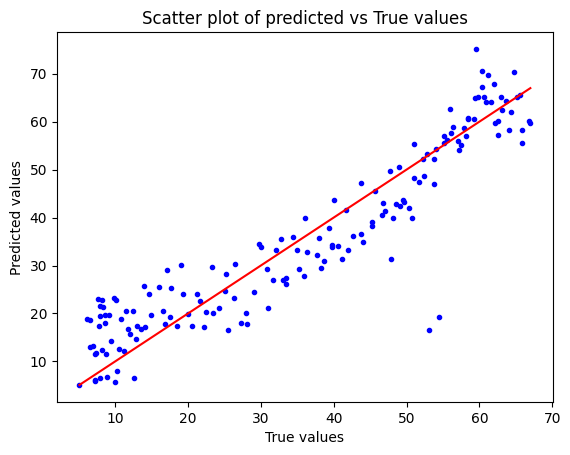

In [ ]:
# @title PLS Training plot
import matplotlib.pyplot as plt
plt.scatter(y_train,y_pred,color='blue',marker='.')
plt.plot(y_train, y_train, color='red')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('Scatter plot of predicted vs True values')
#plt.savefig('Scatter_plot_training_RIDGE_AP.jpg')
#plt.show()

Text(0.5, 1.0, 'Scatter plot of predicted vs True values')

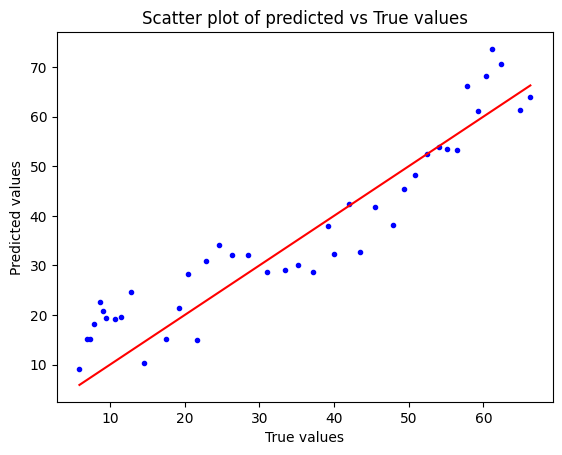

In [ ]:
# @title PLS Testing plot
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred_test,color='blue',marker='.')
plt.plot(y_test, y_test, color='red')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('Scatter plot of predicted vs True values')
#plt.savefig('Scatter_plot_test_RIDGE_AP.jpg')
#plt.show()

# **5 Multiple Linear Regression**

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import linear_model
from sklearn.decomposition import PCA

Dataset=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/features_selected_ok.xlsx')
features=Dataset[['Erg','Eyb','Ecb','Ecr','Ea','Eb','Ehl','Etrg','Etyb','Etcb','Etcr','Eta','Etb','Ethl']]
label=Y=Dataset['MC']
scalertr = StandardScaler().fit(features)
features = scalertr.transform(features)

indx_test = [2,7,16,21,24,30,36,40,46,50,55,61,66,72,78,
        84,87,92,96,101,106,111,117,122,127,132,136,
        140,143,146,151,158,164,169,173,180,181,187,194,200,203,207]
y_test=label[indx_test]
y_train = label.drop(y_test.index)
x_test = features[indx_test]
indx_label = label.index
indx_train = indx_label.drop(indx_test)
x_train = features[indx_train]
x_train
            # MODEL
reg = linear_model.LinearRegression()
pca = PCA(n_components=12)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.fit_transform(x_test)
model= reg.fit(x_train_pca, y_train)

       #TRAINING MODEL
y_pred = model.predict(x_train_pca)
Rsquared_tr=r2_score(y_train,y_pred )
mse_training=mean_squared_error(y_train,y_pred)
mae_training = mean_absolute_error(y_train,y_pred)

        # MODEL TESTING
y_pred_test = model.predict(x_test_pca)
Rsquared_tt=r2_score(y_test,y_pred_test)
mse_test= mean_squared_error(y_test,y_pred_test)
mae_test = mean_absolute_error(y_test,y_pred_test)

print("TRAINING Rsquared:",Rsquared_tr)
print("TRAINING MSE:",mse_training)
print("TRAINING MAE:",mae_training)
print("TEST Rsquared:",Rsquared_tt)
print("TEST MSE:",mse_test)
print("TEST MAE:",mae_test)


TRAINING Rsquared: 0.868820834293694
TRAINING MSE: 51.2543692498497
TRAINING MAE: 5.378673836982884
TEST Rsquared: -2.1548674434974764
TEST MSE: 1202.9347884041767
TEST MAE: 30.032787431475725


Text(0.5, 1.0, 'Scatter plot of predicted vs True values')

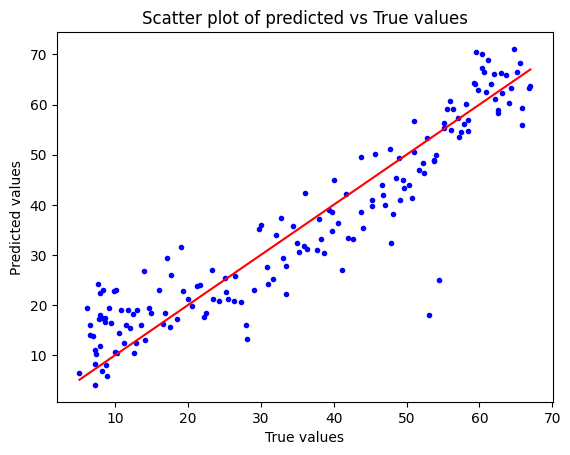

In [ ]:
# @title MLR Training plot
import matplotlib.pyplot as plt
plt.scatter(y_train,y_pred,color='blue',marker='.')
plt.plot(y_train, y_train, color='red')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('Scatter plot of predicted vs True values')
#plt.savefig('Scatter_plot_training_RIDGE_AP.jpg')
#plt.show()

Text(0.5, 1.0, 'Scatter plot of predicted vs True values')

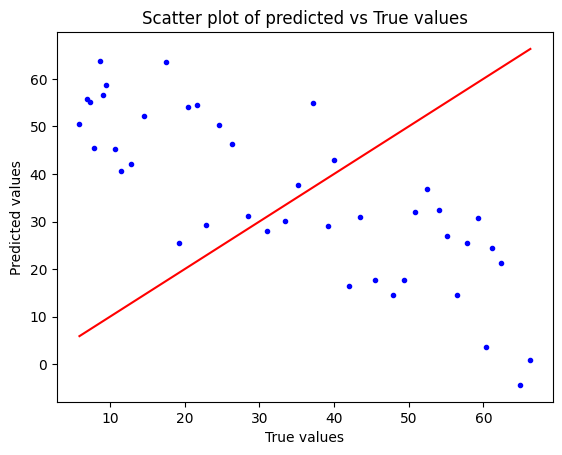

In [ ]:
# @title MLR Testing plot
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred_test,color='blue',marker='.')
plt.plot(y_test, y_test, color='red')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('Scatter plot of predicted vs True values')
#plt.savefig('Scatter_plot_test_RIDGE_AP.jpg')
#plt.show()

# **6 Decision Trees Regression**

In [3]:
# @title Hyperparameters reseach with GridSearchCV
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

Dataset=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/features_selected_ok.xlsx')
features=Dataset[['Erg','Eyb','Ecb','Ecr','Ea','Eb','Ehl','Etrg','Etyb','Etcb','Etcr','Eta','Etb','Ethl']]
label=Y=Dataset['MC']
scalertr = StandardScaler().fit(features)
features = scalertr.transform(features)
indx_test = [2,7,16,21,24,30,36,40,46,50,55,61,66,72,78,
        84,87,92,96,101,106,111,117,122,127,132,136,
        140,143,146,151,158,164,169,173,180,181,187,194,200,203,207]
y_test=label[indx_test]
y_train = label.drop(y_test.index)
x_test = features[indx_test]
indx_label = label.index
indx_train = indx_label.drop(indx_test)
x_train = features[indx_train]
x_train

# Tuning of parameters for regression by cross-validation
K = 20               # Number of cross valiations
# Parameters for tuning
parameters = [{'min_samples_split': [2,3,4,5,6,7],'min_samples_leaf': [1,2,3,4,5,6,7], 'max_depth': [1,2,3,4,5,6,7,8,9]}]
print("Tuning hyper-parameters")
grid_search = GridSearchCV(DecisionTreeRegressor(random_state=100), parameters, cv = K)
grid_search.fit(x_train, y_train)

# Checking the score for all parameters
print("Grid scores on training set:")
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid_search.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"% (mean, std * 2, params))

    best_params = grid_search.best_params_
print("Best parameters:", best_params)

Tuning hyper-parameters
Grid scores on training set:
-264.552 (+/-876.786) for {'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2}
-264.552 (+/-876.786) for {'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 3}
-264.552 (+/-876.786) for {'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 4}
-264.552 (+/-876.786) for {'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 5}
-264.552 (+/-876.786) for {'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 6}
-264.552 (+/-876.786) for {'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 7}
-264.552 (+/-876.786) for {'max_depth': 1, 'min_samples_leaf': 2, 'min_samples_split': 2}
-264.552 (+/-876.786) for {'max_depth': 1, 'min_samples_leaf': 2, 'min_samples_split': 3}
-264.552 (+/-876.786) for {'max_depth': 1, 'min_samples_leaf': 2, 'min_samples_split': 4}
-264.552 (+/-876.786) for {'max_depth': 1, 'min_samples_leaf': 2, 'min_samples_split': 5}
-264.552 (+/-876.786) for {'max_depth': 1, 'min

In [33]:
# @title DTR Model
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

Dataset=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/features_selected_ok.xlsx')
features=Dataset[['Erg','Eyb','Ecb','Ecr','Ea','Eb','Ehl','Etrg','Etyb','Etcb','Etcr','Eta','Etb','Ethl']]
label=Y=Dataset['MC']
scalertr = StandardScaler().fit(features)
features = scalertr.transform(features)

indx_test = [2,7,16,21,24,30,36,40,46,50,55,61,66,72,78,
        84,87,92,96,101,106,111,117,122,127,132,136,
        140,143,146,151,158,164,169,173,180,181,187,194,200,203,207]
y_test=label[indx_test]
y_train = label.drop(y_test.index)
x_test = features[indx_test]
indx_label = label.index
indx_train = indx_label.drop(indx_test)
x_train = features[indx_train]
x_train
            # MODEL
reg =  DecisionTreeRegressor(max_depth=7,min_samples_leaf=1, random_state= None,min_samples_split=15)
model= reg.fit(x_train, y_train)

       #TRAINING MODEL
y_pred = model.predict(x_train)
Rsquared_tr=r2_score(y_train,y_pred )
mse_training=mean_squared_error(y_train,y_pred)
mae_training = mean_absolute_error(y_train,y_pred)

        # MODEL TESTING
y_pred_test = model.predict(x_test)
Rsquared_tt=r2_score(y_test,y_pred_test)
mse_test= mean_squared_error(y_test,y_pred_test)
mae_test = mean_absolute_error(y_test,y_pred_test)

print("TRAINING Rsquared:",Rsquared_tr)
print("TRAINING MSE:",mse_training)
print("TRAINING MAE:",mae_training)
print("TEST Rsquared:",Rsquared_tt)
print("TEST MSE:",mse_test)
print("TEST MAE:",mae_test)


TRAINING Rsquared: 0.9659295591697035
TRAINING MSE: 13.312014491164195
TRAINING MAE: 2.609111154979418
TEST Rsquared: 0.8751677946735386
TEST MSE: 47.59788016131074
TEST MAE: 5.264553171696029


Text(0.5, 1.0, 'Scatter plot of predicted vs True values')

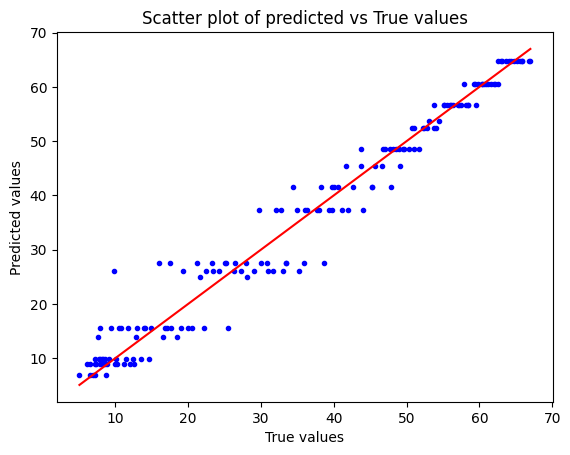

In [23]:
# @title DTR Training plot
import matplotlib.pyplot as plt
plt.scatter(y_train,y_pred,color='blue',marker='.')
plt.plot(y_train, y_train, color='red')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('Scatter plot of predicted vs True values')
#plt.savefig('Scatter_plot_training_RIDGE_AP.jpg')
#plt.show()

Text(0.5, 1.0, 'Scatter plot of predicted vs True values')

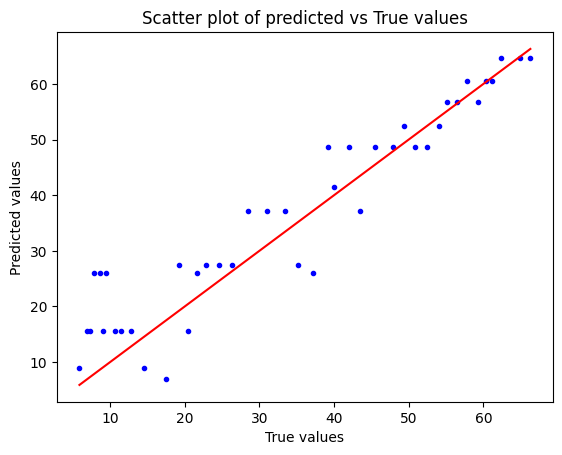

In [24]:
# @title DTR Testing plot
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred_test,color='blue',marker='.')
plt.plot(y_test, y_test, color='red')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('Scatter plot of predicted vs True values')
#plt.savefig('Scatter_plot_test_RIDGE_AP.jpg')
#plt.show()

In [82]:
# @title DTR with AdaBoost Model
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import AdaBoostRegressor

Dataset=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/features_selected_ok.xlsx')
features=Dataset[['Erg','Eyb','Ecb','Ecr','Ea','Eb','Ehl','Etrg','Etyb','Etcb','Etcr','Eta','Etb','Ethl']]
label=Y=Dataset['MC']
scalertr = StandardScaler().fit(features)
features = scalertr.transform(features)

indx_test = [2,7,16,21,24,30,36,40,46,50,55,61,66,72,78,
        84,87,92,96,101,106,111,117,122,127,132,136,
        140,143,146,151,158,164,169,173,180,181,187,194,200,203,207]
y_test=label[indx_test]
y_train = label.drop(y_test.index)
x_test = features[indx_test]
indx_label = label.index
indx_train = indx_label.drop(indx_test)
x_train = features[indx_train]
x_train
            # MODEL
reg =  AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=4), n_estimators=300, random_state= None,
loss ='linear',learning_rate = 1)
#DecisionTreeRegressor(max_depth=7,min_samples_leaf=1, random_state=100,min_samples_split=15)
model= reg.fit(x_train, y_train)

       #TRAINING MODEL
y_pred = model.predict(x_train)
Rsquared_tr=r2_score(y_train,y_pred )
mse_training=mean_squared_error(y_train,y_pred)
mae_training = mean_absolute_error(y_train,y_pred)

        # MODEL TESTING
y_pred_test = model.predict(x_test)
Rsquared_tt=r2_score(y_test,y_pred_test)
mse_test= mean_squared_error(y_test,y_pred_test)
mae_test = mean_absolute_error(y_test,y_pred_test)

print("TRAINING Rsquared:",Rsquared_tr)
print("TRAINING MSE:",mse_training)
print("TRAINING MAE:",mae_training)
print("TEST Rsquared:",Rsquared_tt)
print("TEST MSE:",mse_test)
print("TEST MAE:",mae_test)


TRAINING Rsquared: 0.9784276732627478
TRAINING MSE: 8.42874700579359
TRAINING MAE: 2.502966605856036
TEST Rsquared: 0.9064734262471097
TEST MSE: 35.661203274796385
TEST MAE: 4.644406410268361


Text(0.5, 1.0, 'Scatter plot of predicted vs True values')

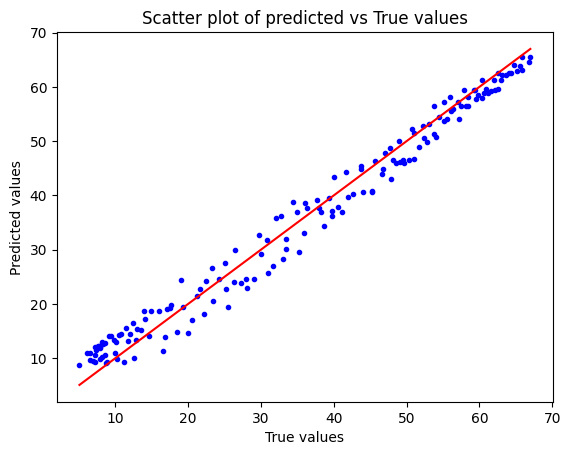

In [83]:
# @title DTR with AdaBoost Training plot
import matplotlib.pyplot as plt
plt.scatter(y_train,y_pred,color='blue',marker='.')
plt.plot(y_train, y_train, color='red')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('Scatter plot of predicted vs True values')
#plt.savefig('Scatter_plot_training_RIDGE_AP.jpg')
#plt.show()

Text(0.5, 1.0, 'Scatter plot of predicted vs True values')

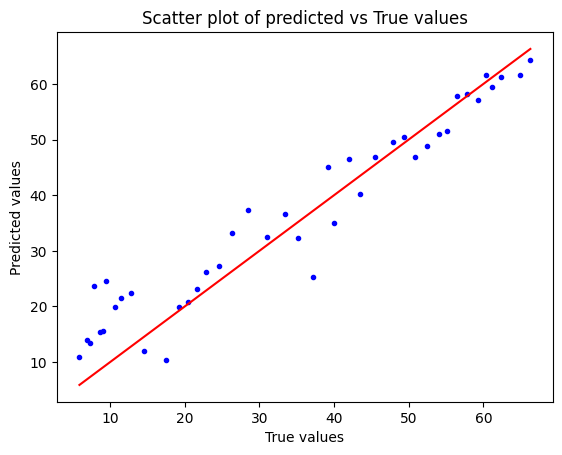

In [84]:
# @title DTR with AdaBoost Testing plot
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred_test,color='blue',marker='.')
plt.plot(y_test, y_test, color='red')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('Scatter plot of predicted vs True values')
#plt.savefig('Scatter_plot_test_RIDGE_AP.jpg')
#plt.show()